`Author- Swaroop Srisailam`

## Dependencies

In [2]:
!pip install -U shap
!pip install -U numba


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import shap


## Reading the data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
adasyn_wo_triggers_train = pd.read_csv("/content/drive/MyDrive/Data/adasyn_wo_triggers_train.csv")
adasyn_wo_triggers_test = pd.read_csv("/content/drive/MyDrive/Data/adasyn_wo_triggers_test.csv")

adasyn_w_triggers_train = pd.read_csv("/content/drive/MyDrive/Data/adasyn_w_triggers_train.csv")
adasyn_w_triggers_test = pd.read_csv("/content/drive/MyDrive/Data/adasyn_w_triggers_test.csv")


smote_wo_triggers_train= pd.read_csv("/content/drive/MyDrive/Data/smote_wo_triggers_train.csv")
smote_wo_triggers_test= pd.read_csv("/content/drive/MyDrive/Data/smote_wo_triggers_test.csv")

smote_w_triggers_train = pd.read_csv("/content/drive/MyDrive/Data/smote_w_triggers_train.csv")
smote_w_triggers_test = pd.read_csv("/content/drive/MyDrive/Data/smote_w_triggers_test.csv")

mwmote_wo_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/mwmote_wo_triggers_train.csv")
mwmote_wo_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/mwmote_wo_triggers_test.csv")

mwmote_w_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/mwmote_w_triggers_train.csv")
mwmote_w_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/mwmote_w_triggers_test.csv")

rose_wo_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/rose_wo_triggers_train.csv")
rose_wo_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/rose_wo_triggers_test.csv")

rose_w_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/rose_w_triggers_train.csv")
rose_w_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/rose_w_triggers_test.csv")

In [17]:
def Evaluate(y_test, tree_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, tree_pred)

    # Calculate precision
    precision = precision_score(y_test, tree_pred)

    # Calculate recall
    recall = recall_score(y_test, tree_pred)


    # Calculate F1 score
    f1 = f1_score(y_test, tree_pred)

    # Print the results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    return 0

## Chunk 49

In [18]:
# Split the data into features and labels
X_train = adasyn_wo_triggers_train.drop("fraud", axis=1)
y_train = adasyn_wo_triggers_train["fraud"]
X_test = adasyn_wo_triggers_test.drop("fraud", axis=1)
y_test = adasyn_wo_triggers_test["fraud"]


# Create and fit the Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(X_train, y_train)

# Make predictions on the test set
tree_pred_prob = tree.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, tree_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tree_pred_prob)

# Find the threshold that gives the best F1 score (assumes equal misclassification costs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions based on the threshold
tree_pred = np.where(tree_pred_prob > optimal_threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, tree_pred)

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, tree_pred_prob)
pr_auc = auc(recall, precision)

#print("Precision:",precision)
# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

Evaluate(y_test,tree_pred)

Confusion Matrix:
[[30052  1752]
 [19965 11842]]
ROC AUC: 0.6360888189951234
PR AUC: 0.7303116740677356
Accuracy: 0.6585967835751678
Precision: 0.87111961159335
Recall: 0.37230798251957115
F1 Score: 0.5216625184467303


0

## Chunk 50

In [20]:
# Split the data into features and labels
X_train = adasyn_w_triggers_train.drop("fraud", axis=1)
y_train = adasyn_w_triggers_train["fraud"]
X_test = adasyn_w_triggers_test.drop("fraud", axis=1)
y_test = adasyn_w_triggers_test["fraud"]

# Create and fit the Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(X_train, y_train)

# Make predictions on the test set
tree_pred_prob = tree.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, tree_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tree_pred_prob)

# Find the threshold that gives the best F1 score (assumes equal misclassification costs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions based on the threshold
tree_pred = np.where(tree_pred_prob > optimal_threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, tree_pred)

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, tree_pred_prob)
pr_auc = auc(recall, precision)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

Evaluate(y_test,tree_pred)


Confusion Matrix:
[[30853   951]
 [12459 19378]]
ROC AUC: 0.7975643922371258
PR AUC: 0.8859336250240808
Accuracy: 0.789286780534561
Precision: 0.9532195385901914
Recall: 0.608662876527311
F1 Score: 0.7429360119618142


0

## Chunk 51

In [21]:
# Split the data into features and labels
X_train = smote_wo_triggers_train.drop("fraud", axis=1)
y_train = smote_wo_triggers_train["fraud"]
X_test = smote_wo_triggers_test.drop("fraud", axis=1)
y_test = smote_wo_triggers_test["fraud"]

# Create and fit the Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(X_train, y_train)

# Make predictions on the test set
tree_pred_prob = tree.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, tree_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tree_pred_prob)

# Find the threshold that gives the best F1 score (assumes equal misclassification costs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions based on the threshold
tree_pred = np.where(tree_pred_prob > optimal_threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, tree_pred)

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, tree_pred_prob)
pr_auc = auc(recall, precision)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

Evaluate(y_test,tree_pred)

Confusion Matrix:
[[30349  1455]
 [ 5122 13004]]
ROC AUC: 0.8532437818444217
PR AUC: 0.8603114993116557
Accuracy: 0.8682755858201482
Precision: 0.8993706342070683
Recall: 0.7174224870351981
F1 Score: 0.798158661961025


0

## Chunk 52

In [22]:
# Split the data into features and labels
X_train = smote_w_triggers_train.drop("fraud", axis=1)
y_train = smote_w_triggers_train["fraud"]
X_test = smote_w_triggers_test.drop("fraud", axis=1)
y_test = smote_w_triggers_test["fraud"]

# Create and fit the Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(X_train, y_train)

# Make predictions on the test set
tree_pred_prob = tree.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, tree_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tree_pred_prob)

# Find the threshold that gives the best F1 score (assumes equal misclassification costs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions based on the threshold
tree_pred = np.where(tree_pred_prob > optimal_threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, tree_pred)

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, tree_pred_prob)
pr_auc = auc(recall, precision)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

Evaluate(y_test,tree_pred)

Confusion Matrix:
[[30474  1330]
 [ 4384 13742]]
ROC AUC: 0.866295754305171
PR AUC: 0.8850352577157912
Accuracy: 0.885559783697176
Precision: 0.9117569002123143
Recall: 0.7581374820699548
F1 Score: 0.8278811976625098


0

## Chunk 53

In [23]:
# Split the data into features and labels
X_train = mwmote_wo_triggers_train.drop("fraud", axis=1)
y_train = mwmote_wo_triggers_train["fraud"]
X_test = mwmote_wo_triggers_test.drop("fraud", axis=1)
y_test = mwmote_wo_triggers_test["fraud"]

# Create and fit the Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(X_train, y_train)

# Make predictions on the test set
tree_pred_prob = tree.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, tree_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tree_pred_prob)

# Find the threshold that gives the best F1 score (assumes equal misclassification costs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions based on the threshold
tree_pred = np.where(tree_pred_prob > optimal_threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, tree_pred)

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, tree_pred_prob)
pr_auc = auc(recall, precision)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

Evaluate(y_test,tree_pred)

Confusion Matrix:
[[31238   566]
 [ 6104 25700]]
ROC AUC: 0.8998555598551125
PR AUC: 0.9356737566761459
Accuracy: 0.8951389762294051
Precision: 0.9784512297266428
Recall: 0.808074456043265
F1 Score: 0.8851386257964526


0

## Chunk 54

In [24]:
# Split the data into features and labels
X_train = mwmote_w_triggers_train.drop("fraud", axis=1)
y_train = mwmote_w_triggers_train["fraud"]
X_test = mwmote_w_triggers_test.drop("fraud", axis=1)
y_test = mwmote_w_triggers_test["fraud"]

# Create and fit the Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(X_train, y_train)

# Make predictions on the test set
tree_pred_prob = tree.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, tree_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tree_pred_prob)

# Find the threshold that gives the best F1 score (assumes equal misclassification costs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions based on the threshold
tree_pred = np.where(tree_pred_prob > optimal_threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, tree_pred)

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, tree_pred_prob)
pr_auc = auc(recall, precision)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

Evaluate(y_test,tree_pred)

Confusion Matrix:
[[30611  1193]
 [ 6697 25107]]
ROC AUC: 0.8867944150865188
PR AUC: 0.9313534233816764
Accuracy: 0.8759589988680669
Precision: 0.954638783269962
Recall: 0.7894290026411772
F1 Score: 0.8642090045435771


0

## Chunk 55

In [25]:
X_train = rose_wo_triggers_train.drop("fraud", axis=1)
y_train = rose_wo_triggers_train["fraud"]
X_test = rose_wo_triggers_test.drop("fraud", axis=1)
y_test = rose_wo_triggers_test["fraud"]

# Create and fit the Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(X_train, y_train)

# Make predictions on the test set
tree_pred_prob = tree.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, tree_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tree_pred_prob)

# Find the threshold that gives the best F1 score (assumes equal misclassification costs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions based on the threshold
tree_pred = np.where(tree_pred_prob > optimal_threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, tree_pred)

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, tree_pred_prob)
pr_auc = auc(recall, precision)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

Evaluate(y_test,tree_pred)

Confusion Matrix:
[[28346  3458]
 [21105 10699]]
ROC AUC: 0.6154019232865443
PR AUC: 0.6717496293415401
Accuracy: 0.613837882027418
Precision: 0.7557392102846648
Recall: 0.3364042258835367
F1 Score: 0.4655686342768869


0

## Chunk 56

In [26]:
# Split the data into features and labels
X_train = rose_w_triggers_train.drop("fraud", axis=1)
y_train = rose_w_triggers_train["fraud"]
X_test = rose_w_triggers_test.drop("fraud", axis=1)
y_test = rose_w_triggers_test["fraud"]

# Create and fit the Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(X_train, y_train)

# Make predictions on the test set
tree_pred_prob = tree.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, tree_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tree_pred_prob)

# Find the threshold that gives the best F1 score (assumes equal misclassification costs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions based on the threshold
tree_pred = np.where(tree_pred_prob > optimal_threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, tree_pred)

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, tree_pred_prob)
pr_auc = auc(recall, precision)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

Evaluate(y_test,tree_pred)

Confusion Matrix:
[[31172   632]
 [20726 11078]]
ROC AUC: 0.6646408130047453
PR AUC: 0.8103298584726935
Accuracy: 0.6642246258332285
Precision: 0.9460290350128095
Recall: 0.34832096591623696
F1 Score: 0.5091694627016593


0

## Chunk 57

Confusion Matrix:
[[27086  4718]
 [ 7216 24591]]
ROC AUC: 0.8816395112071056
PR AUC: 0.8887901390085268


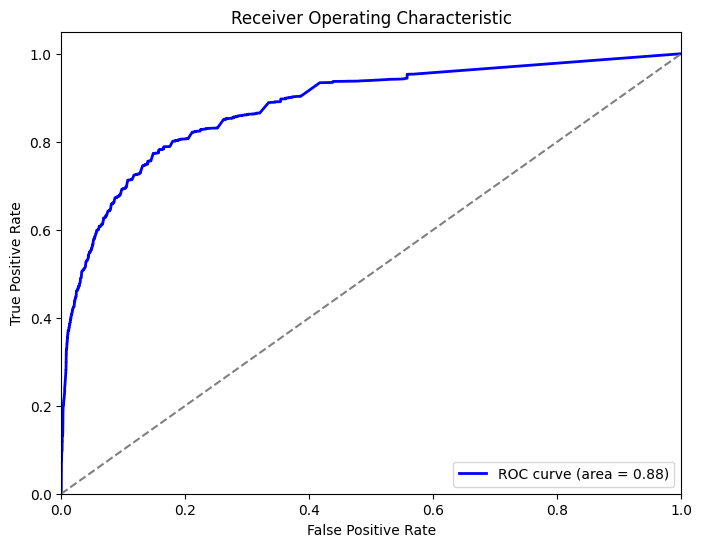

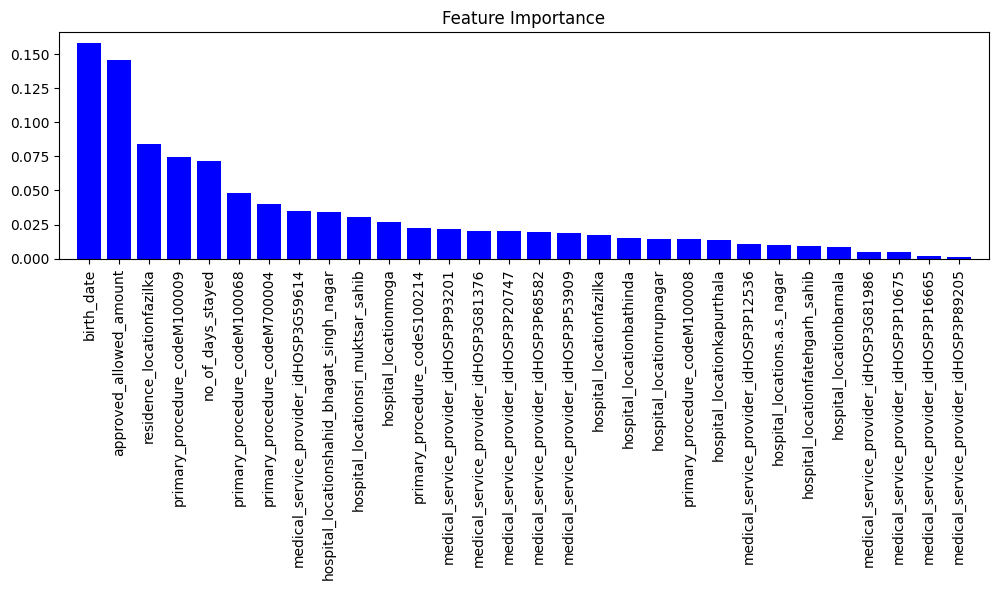

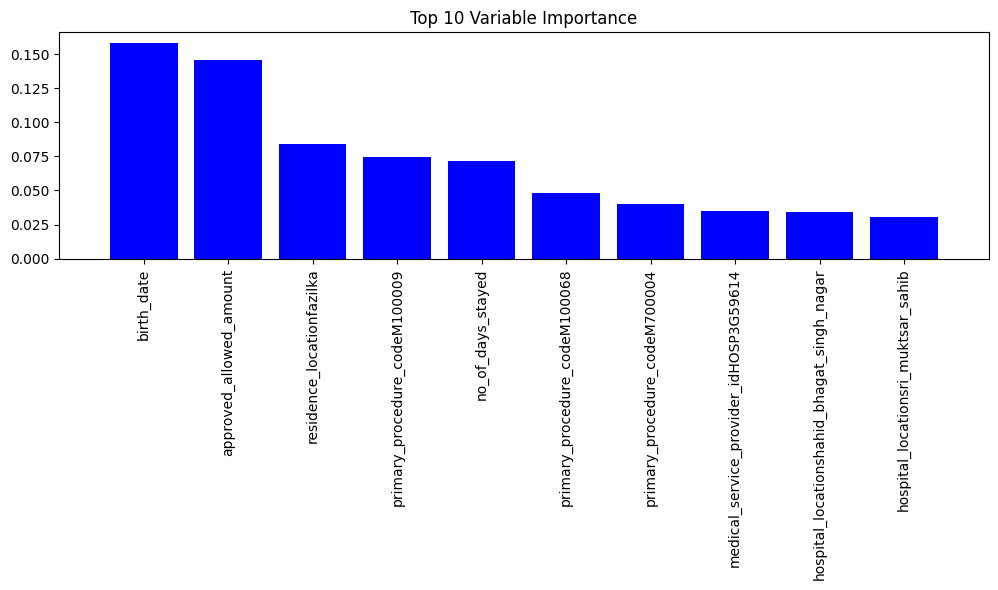

In [27]:
# Split the data into features and labels
X_train = adasyn_wo_triggers_train.drop("fraud", axis=1)
y_train = adasyn_wo_triggers_train["fraud"]
X_test = adasyn_wo_triggers_test.drop("fraud", axis=1)
y_test = adasyn_wo_triggers_test["fraud"]

# Create and fit the Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set (probability of class 1)
y_prob = classifier_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Determine threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

# Classify test set based on threshold
y_pred = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importance plot
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Variable importance plot (top 10 features)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Variable Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.show()

## Chunk 58

Confusion Matrix:
[[29092  2712]
 [ 2759 29078]]
ROC AUC: 0.964006897604804
PR AUC: 0.9599978717126976


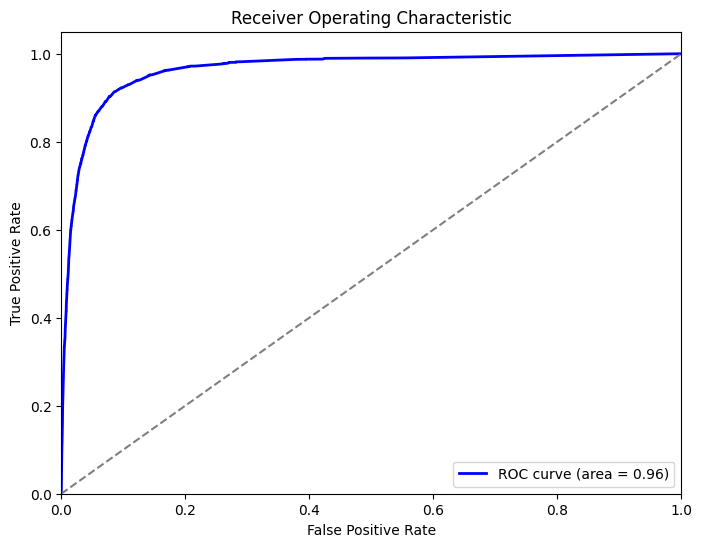

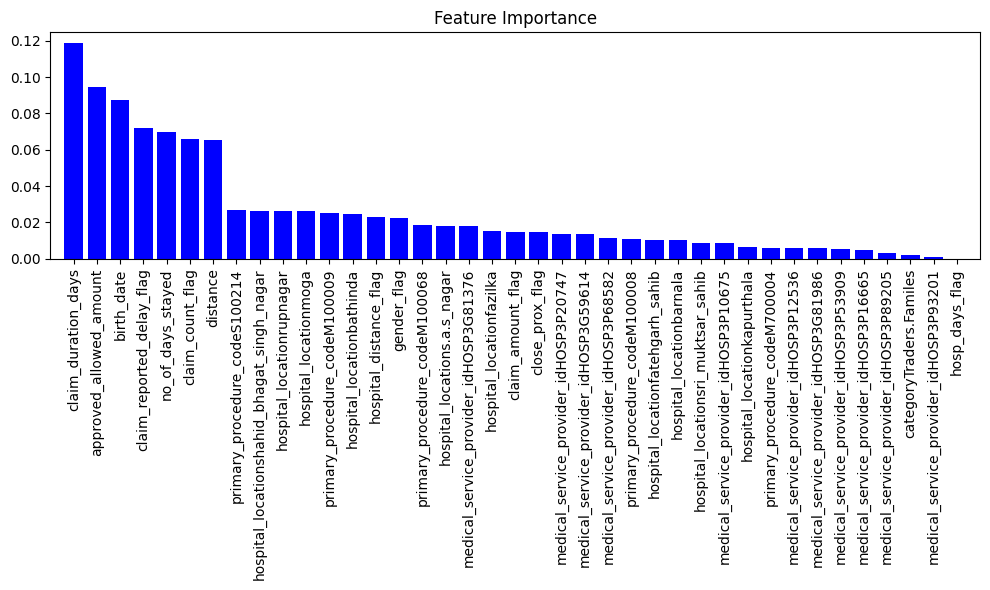

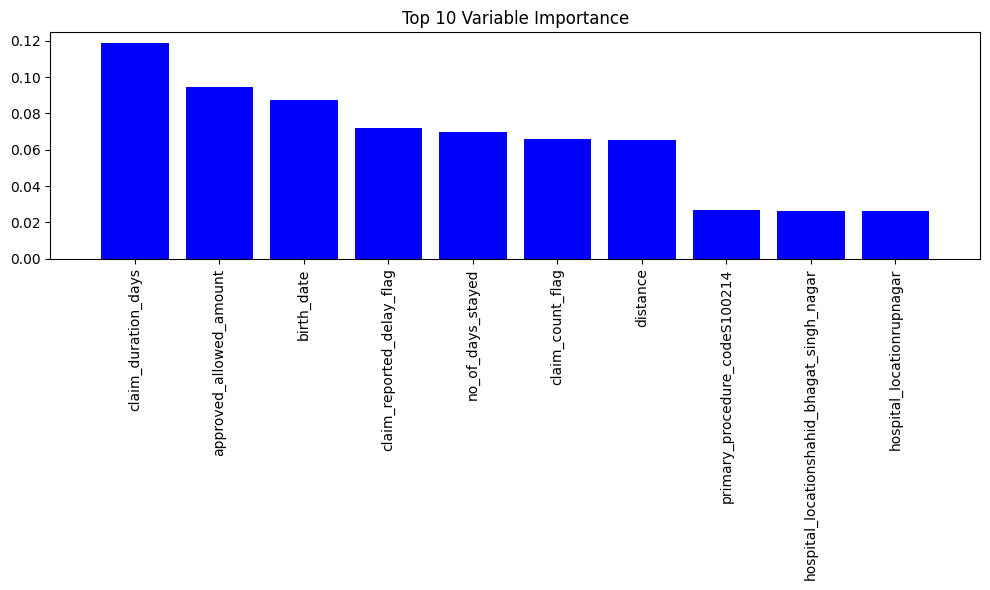

In [28]:
# Split the data into features and labels
X_train = adasyn_w_triggers_train.drop("fraud", axis=1)
y_train = adasyn_w_triggers_train["fraud"]
X_test = adasyn_w_triggers_test.drop("fraud", axis=1)
y_test = adasyn_w_triggers_test["fraud"]

# Create and fit the Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set (probability of class 1)
y_prob = classifier_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Determine threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

# Classify test set based on threshold
y_pred = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importance plot
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Variable importance plot (top 10 features)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Variable Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.show()

## Chunk 59

Confusion Matrix:
[[27729  4075]
 [ 3598 14528]]
ROC AUC: 0.9121140773858553
PR AUC: 0.8714813501171781


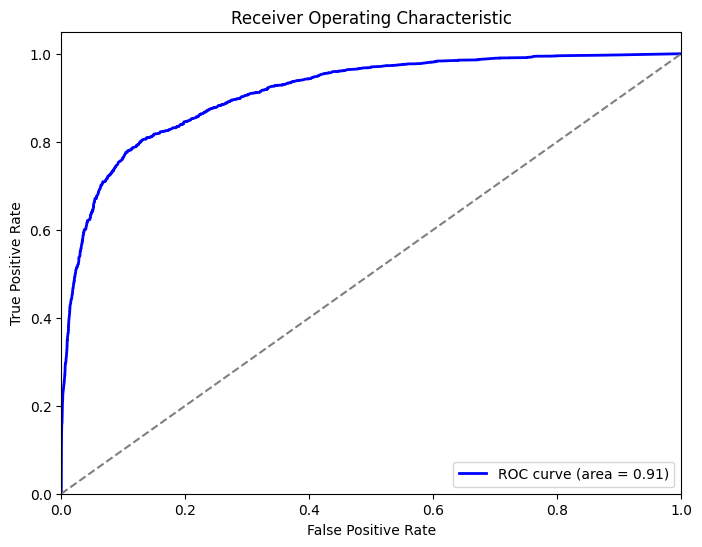

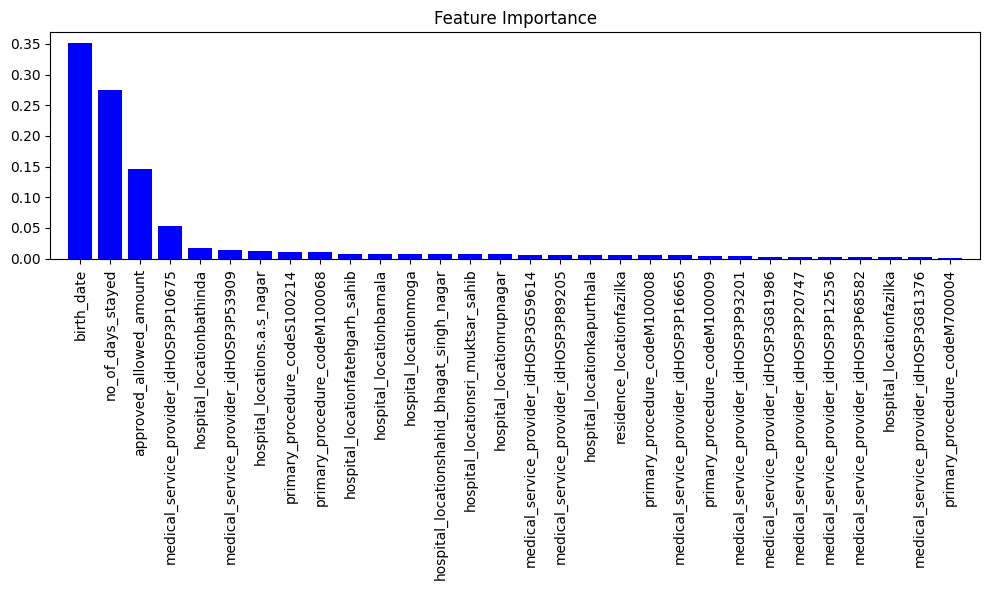

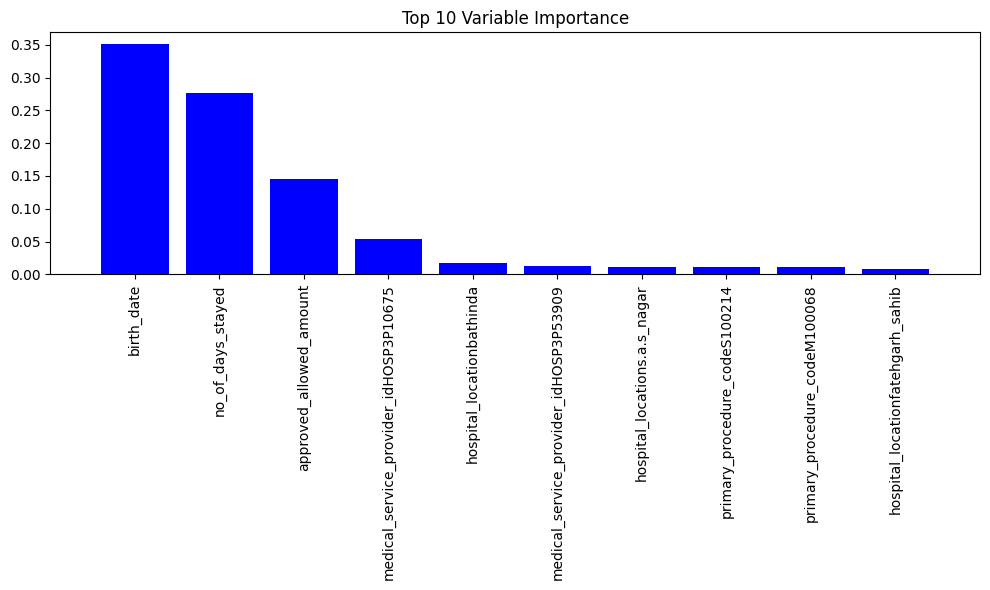

In [29]:
# Split the data into features and labels
X_train = smote_wo_triggers_train.drop("fraud", axis=1)
y_train = smote_wo_triggers_train["fraud"]
X_test = smote_wo_triggers_test.drop("fraud", axis=1)
y_test = smote_wo_triggers_test["fraud"]

# Create and fit the Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set (probability of class 1)
y_prob = classifier_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Determine threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

# Classify test set based on threshold
y_pred = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importance plot
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Variable importance plot (top 10 features)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Variable Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.show()

## Chunk60

Confusion Matrix:
[[29028  2776]
 [ 1380 16746]]
ROC AUC: 0.9707163997339271
PR AUC: 0.9509487241610511


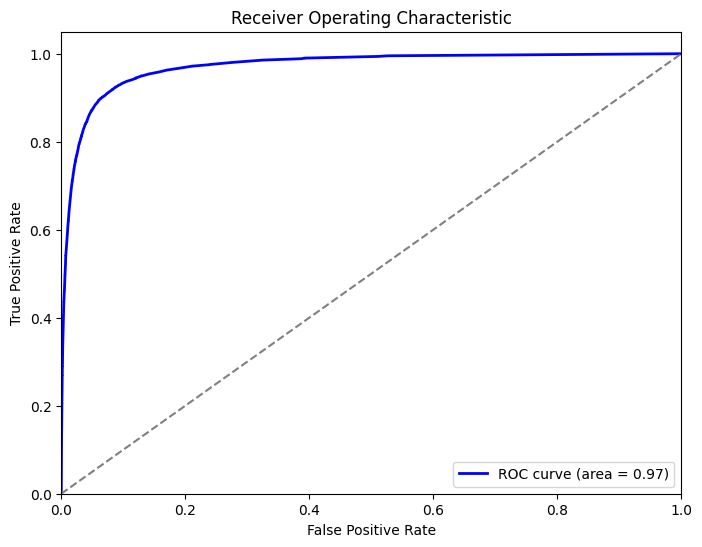

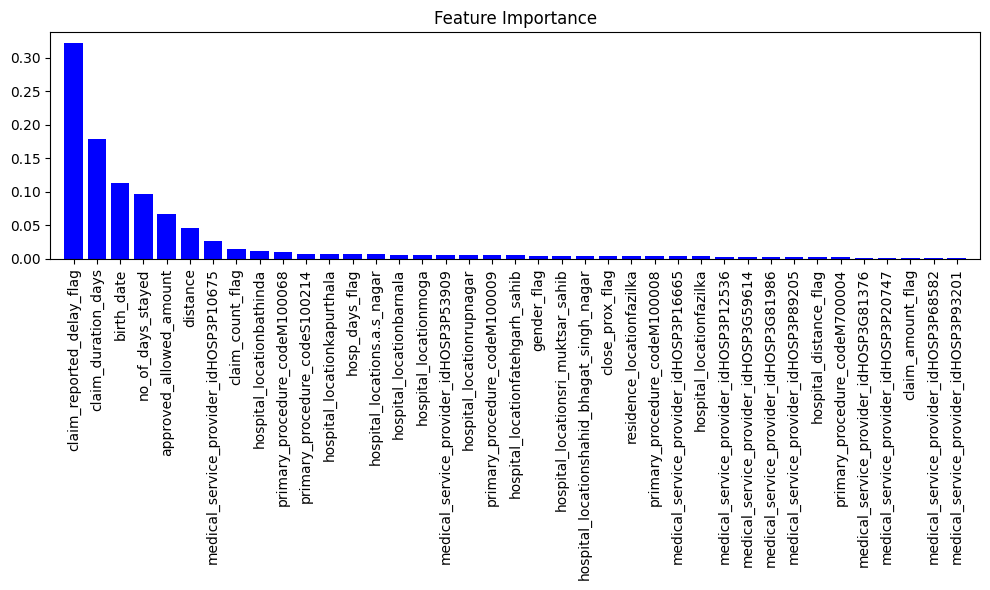

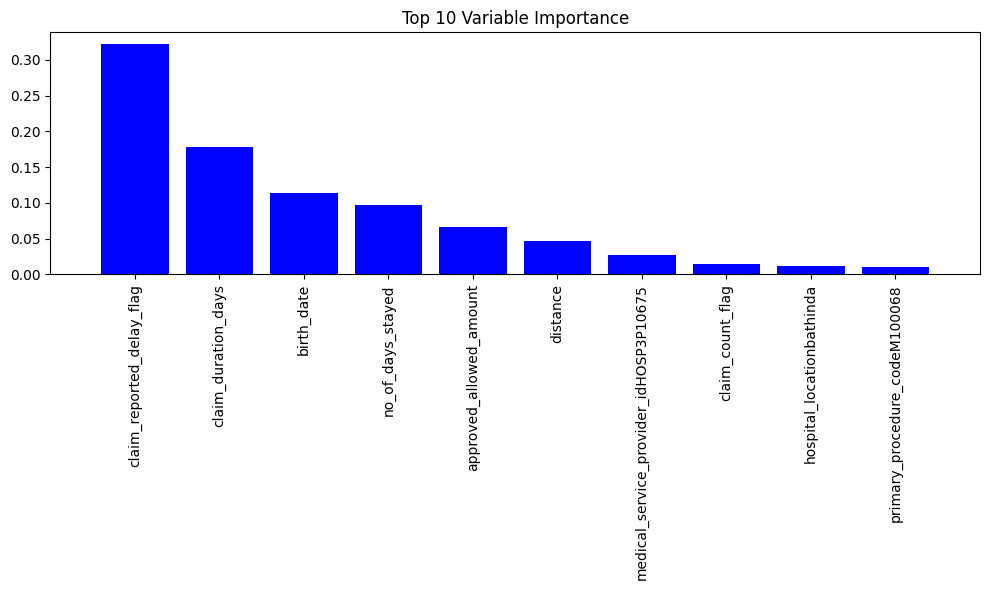

In [30]:
# Split the data into features and labels
X_train = smote_w_triggers_train.drop("fraud", axis=1)
y_train = smote_w_triggers_train["fraud"]
X_test = smote_w_triggers_test.drop("fraud", axis=1)
y_test = smote_w_triggers_test["fraud"]

# Create and fit the Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set (probability of class 1)
y_prob = classifier_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Determine threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

# Classify test set based on threshold
y_pred = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importance plot
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Variable importance plot (top 10 features)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Variable Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.show()

## Chunk 61

Confusion Matrix:
[[28723  3081]
 [ 3248 28556]]
ROC AUC: 0.9545441123819314
PR AUC: 0.963232571594726


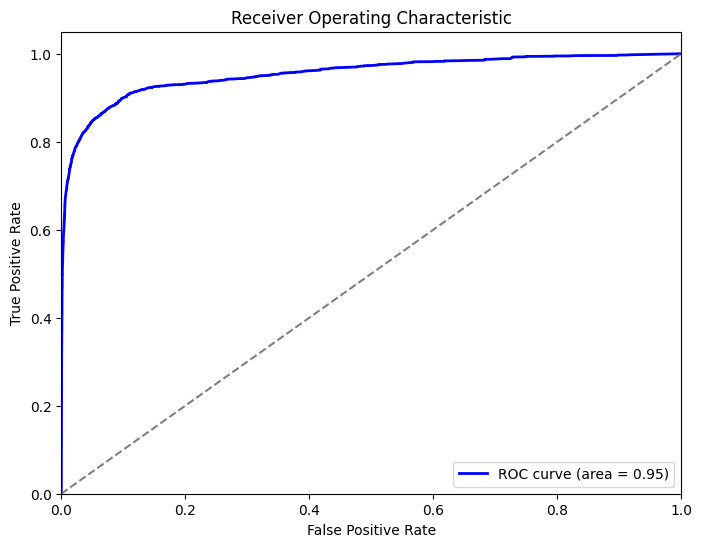

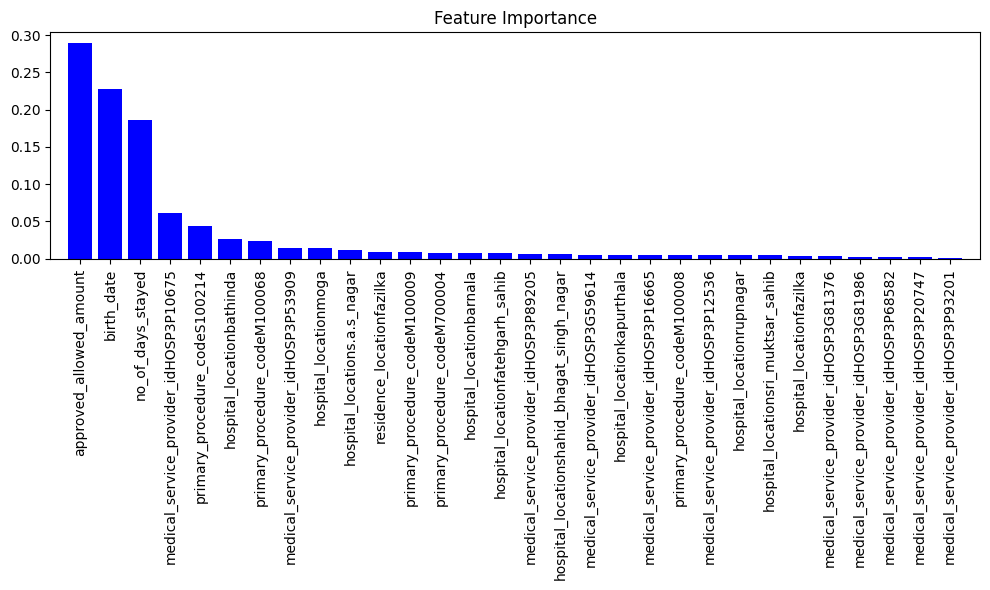

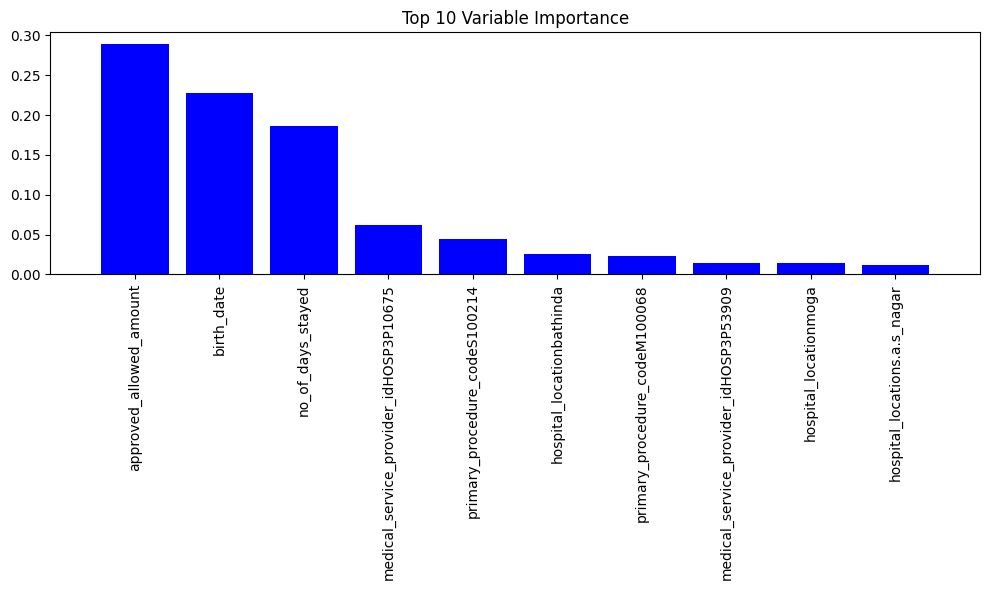

In [31]:
# Split the data into features and labels
X_train = mwmote_wo_triggers_train.drop("fraud", axis=1)
y_train = mwmote_wo_triggers_train["fraud"]
X_test = mwmote_wo_triggers_test.drop("fraud", axis=1)
y_test = mwmote_wo_triggers_test["fraud"]

# Create and fit the Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set (probability of class 1)
y_prob = classifier_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Determine threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

# Classify test set based on threshold
y_pred = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importance plot
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Variable importance plot (top 10 features)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Variable Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.show()

## Chunlk 62

Confusion Matrix:
[[29963  1841]
 [ 3012 28792]]
ROC AUC: 0.972011067434306
PR AUC: 0.974415577554193


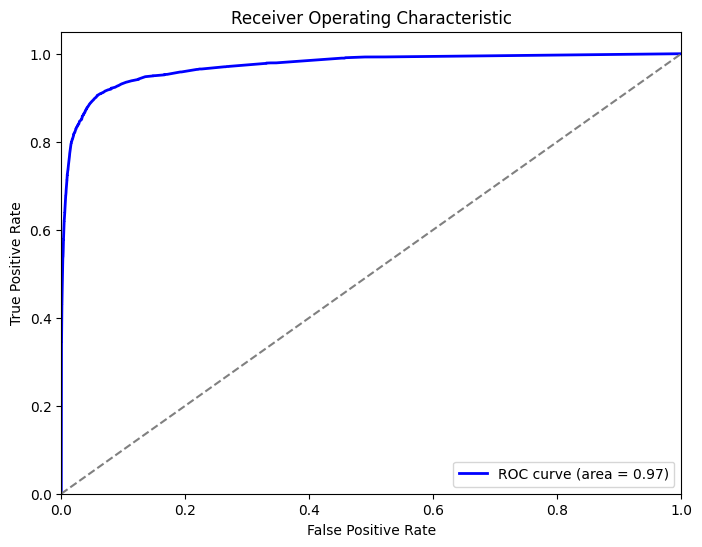

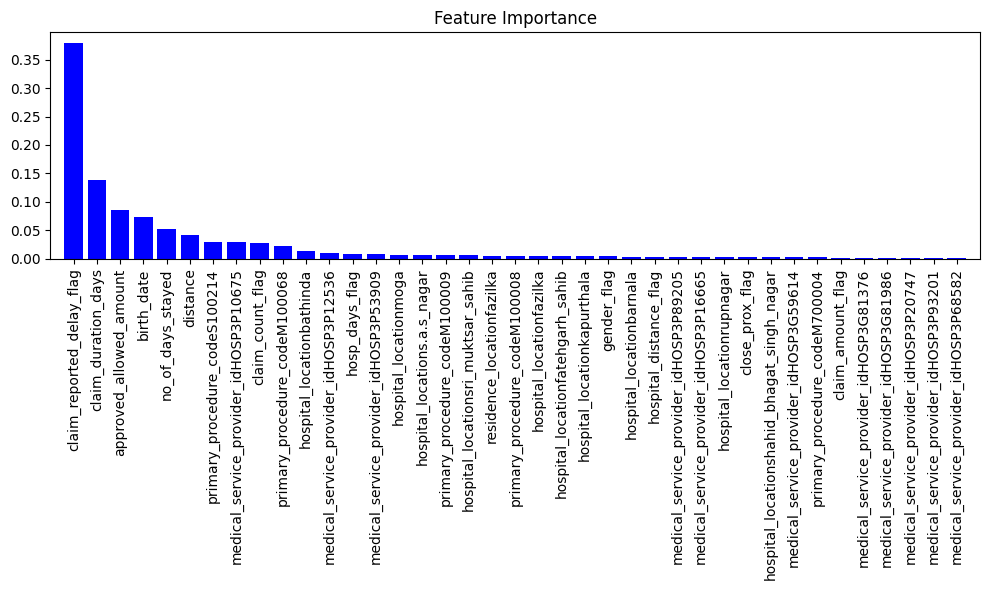

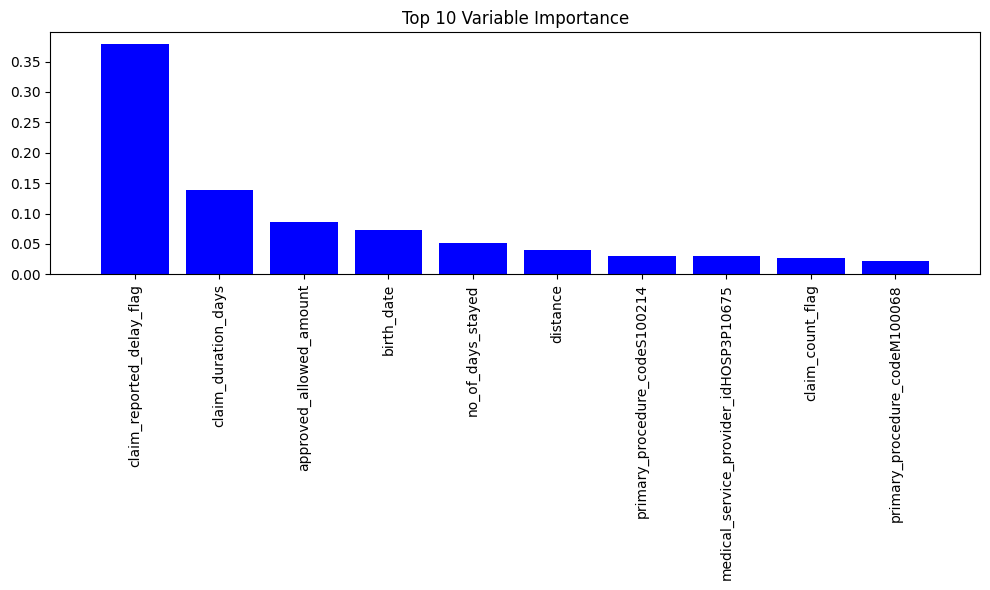

In [32]:
# Split the data into features and labels
X_train = mwmote_w_triggers_train.drop("fraud", axis=1)
y_train = mwmote_w_triggers_train["fraud"]
X_test = mwmote_w_triggers_test.drop("fraud", axis=1)
y_test = mwmote_w_triggers_test["fraud"]

# Create and fit the Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set (probability of class 1)
y_prob = classifier_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Determine threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

# Classify test set based on threshold
y_pred = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importance plot
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Variable importance plot (top 10 features)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Variable Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.show()

## Chunk 63

Confusion Matrix:
[[20471 11333]
 [11607 20197]]
ROC AUC: 0.6731203042054165
PR AUC: 0.6749288867240756


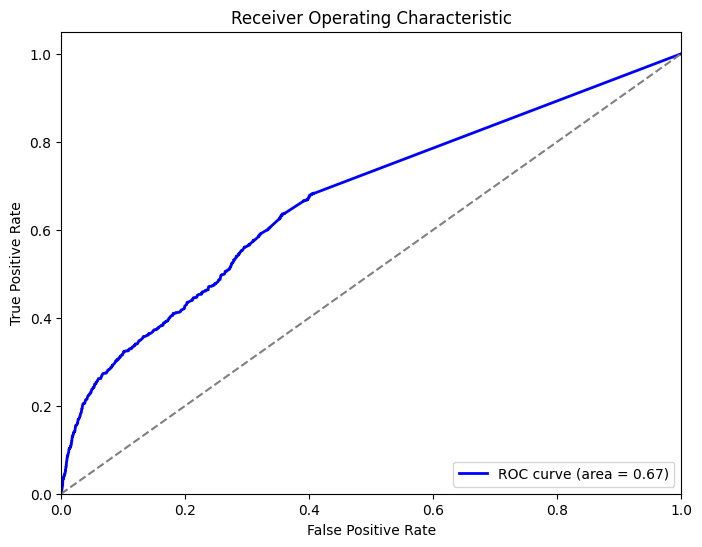

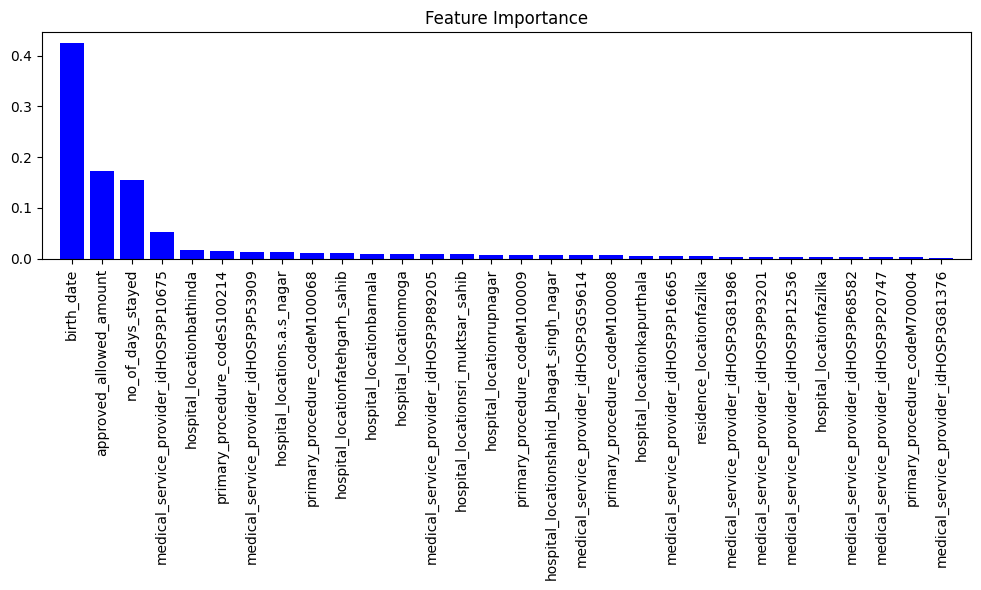

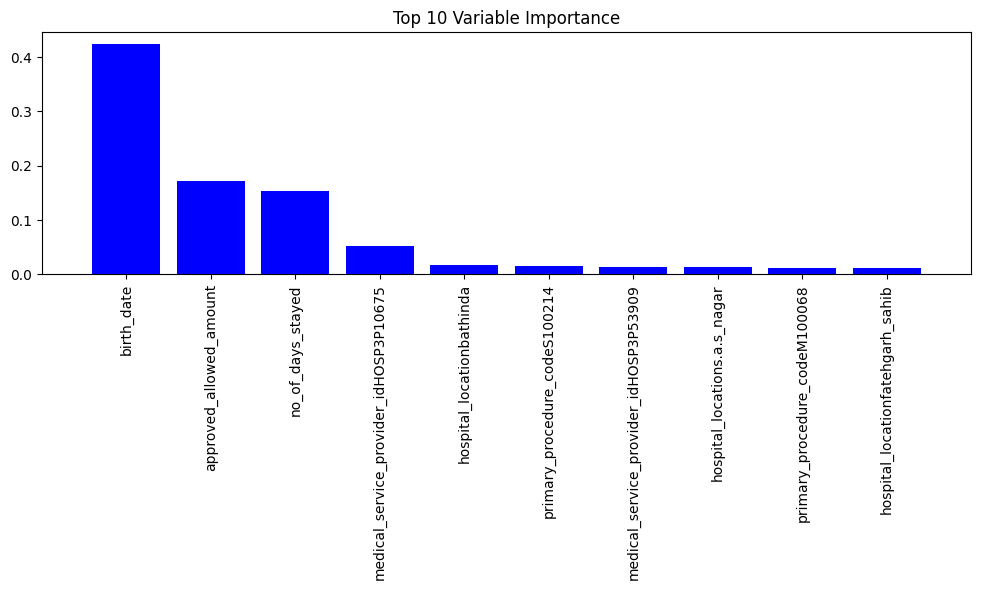

In [33]:
# Split the data into features and labels
X_train = rose_wo_triggers_train.drop("fraud", axis=1)
y_train = rose_wo_triggers_train["fraud"]
X_test = rose_wo_triggers_test.drop("fraud", axis=1)
y_test = rose_wo_triggers_test["fraud"]

# Create and fit the Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set (probability of class 1)
y_prob = classifier_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Determine threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

# Classify test set based on threshold
y_pred = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importance plot
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Variable importance plot (top 10 features)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Variable Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.show()

In [34]:
explainer2 = shap.TreeExplainer(classifier_rf)
choosen_instance = X_test.loc[[321]]
shap.initjs()
shap_values2 = explainer2.shap_values(choosen_instance)

shap.force_plot(explainer2.expected_value[1], shap_values2[1], choosen_instance)

## Chunk 64

Confusion Matrix:
[[28587  3217]
 [ 8050 23754]]
ROC AUC: 0.8820083164947496
PR AUC: 0.8882610321291624


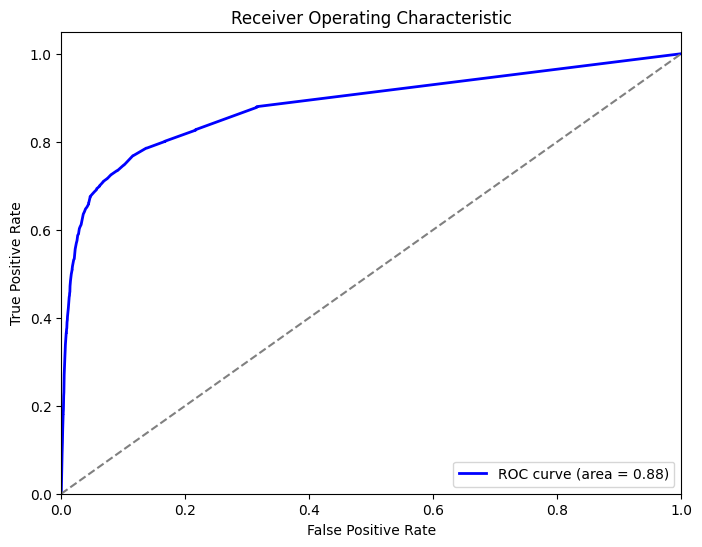

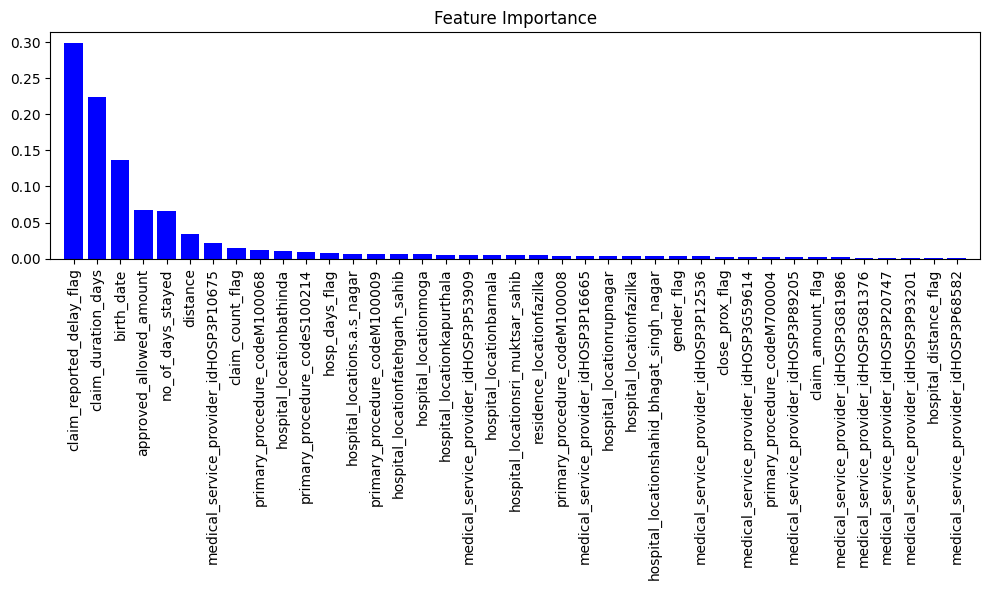

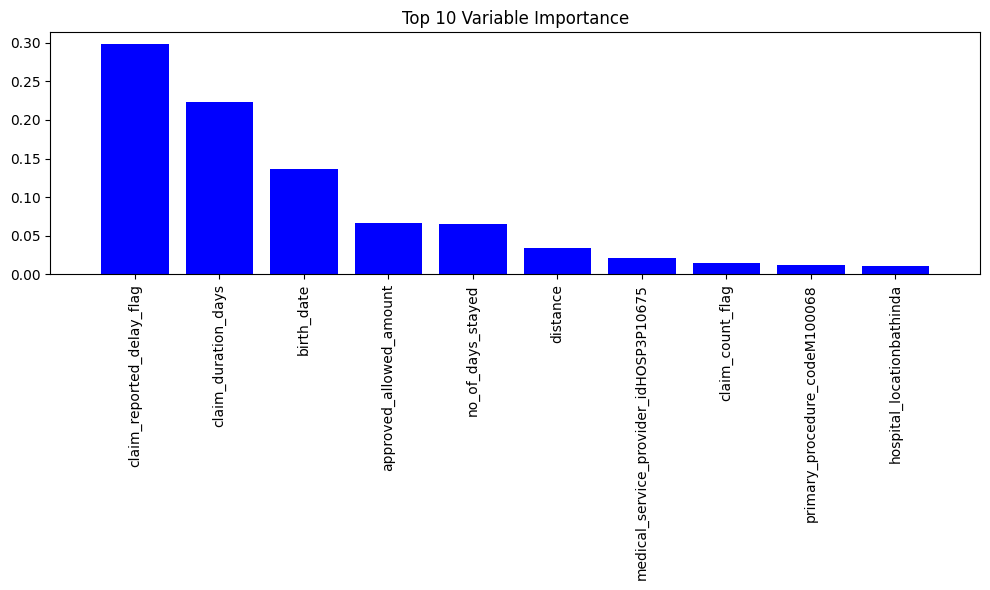

In [35]:
# Split the data into features and labels
X_train = rose_w_triggers_train.drop("fraud", axis=1)
y_train = rose_w_triggers_train["fraud"]
X_test = rose_w_triggers_test.drop("fraud", axis=1)
y_test = rose_w_triggers_test["fraud"]

# Create and fit the Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set (probability of class 1)
y_prob = classifier_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Determine threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

# Classify test set based on threshold
y_pred = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importance plot
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Variable importance plot (top 10 features)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Variable Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.show()

## SHAP

In [36]:
explainer1 = shap.TreeExplainer(classifier_rf)
choosen_instance = X_test.loc[[321]]
shap.initjs()
shap_values1 = explainer1.shap_values(choosen_instance)

shap.force_plot(explainer1.expected_value[1], shap_values1[1], choosen_instance)

## Chunk 65

Confusion Matrix:
[[20471 11333]
 [11607 20197]]
ROC AUC: 0.6731203042054165
PR AUC: 0.6749288867240756


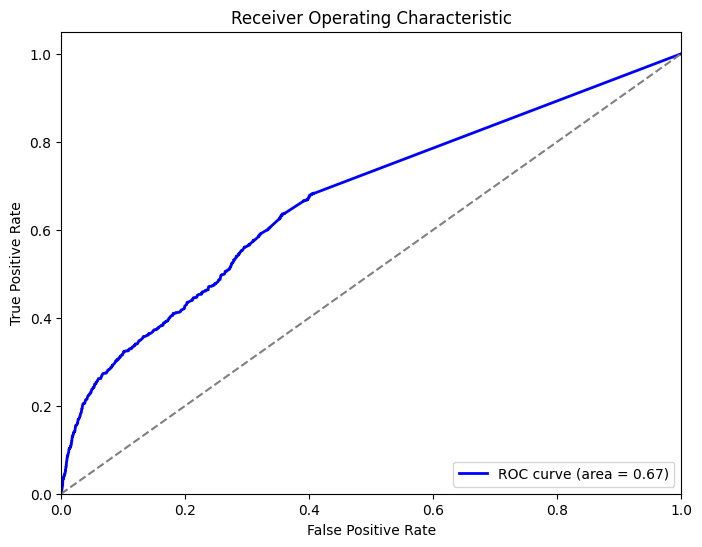

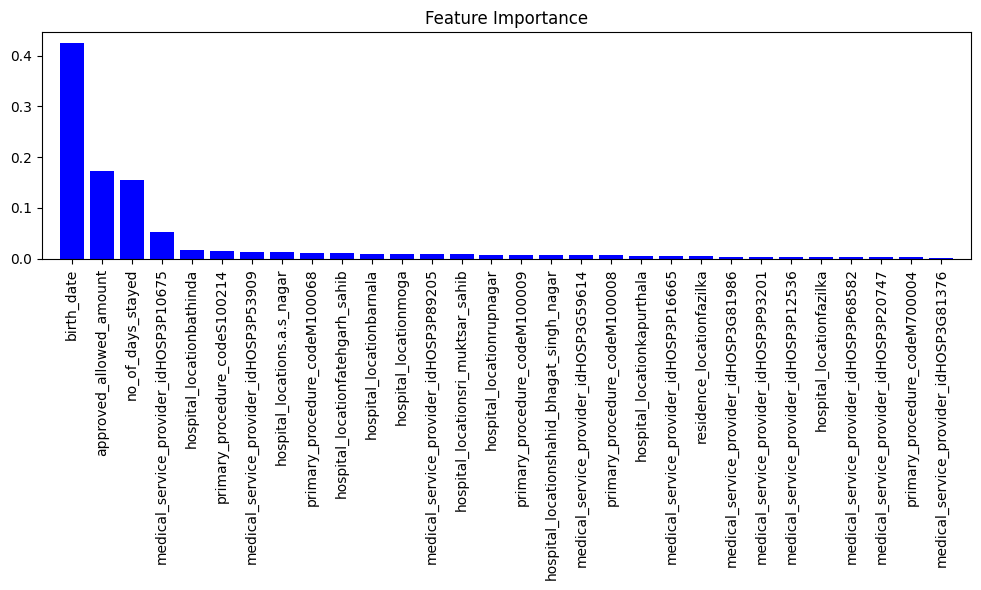

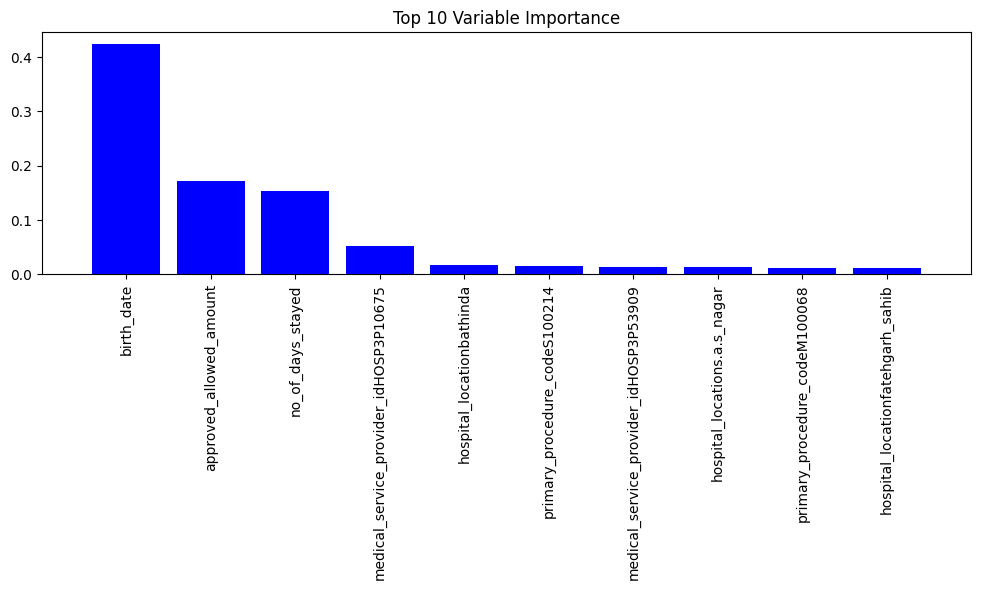

In [37]:
# Split the data into features and labels
X_train = rose_wo_triggers_train.drop("fraud", axis=1)
y_train = rose_wo_triggers_train["fraud"]
X_test = rose_wo_triggers_test.drop("fraud", axis=1)
y_test = rose_wo_triggers_test["fraud"]

# Create and fit the Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set (probability of class 1)
y_prob = classifier_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_prob)

# Determine threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

# Classify test set based on threshold
y_pred = np.where(y_prob > threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Importance plot
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Variable importance plot (top 10 features)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Variable Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
plt.show()